In [2]:
import pandas as pd
df = pd.read_csv('bank-marketing.csv')
print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
  age;job;marital;education;default;balance;housing;loan;contact;day;month;durations;campaign;pdays;previous;poutcome;y
0  58;management;married;tertiary;no;2143;yes;no;...                                                                   
1  44;technician;single;secondary;no;29;yes;no;un...                                                                   
2  33;entrepreneur;married;secondary;no;2;yes;yes...                                                                   
3  47;blue-collar;married;unknown;no;1506;yes;no;...                                                                   
4  33;unknown;single;unknown;no;1;no;no;unknown;5...                                                                   


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  durations  campaign  pdays  previous poutcome   y  
0  unknown    5   may        261         1     -1         0  unknown  no  
1  unknown    5   may        151         1     -1         0  unknown  no  
2  unknown    5   may         76         1     -1         0  unknown  no  
3  unknown    5   may         92         1     -1         0  unknown  no  
4  unknown    5   may        198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45210 entries, 0 to 45209
Data columns (total 17 column

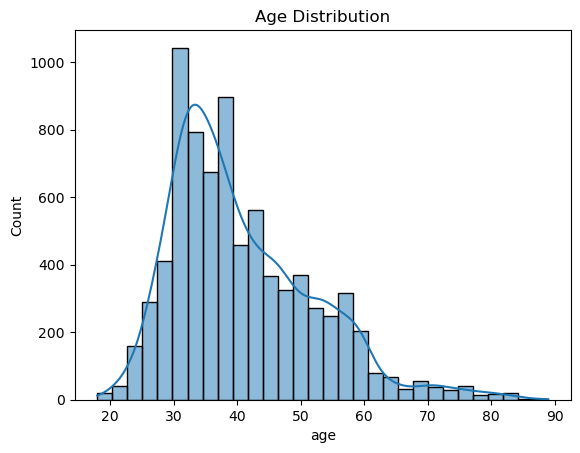

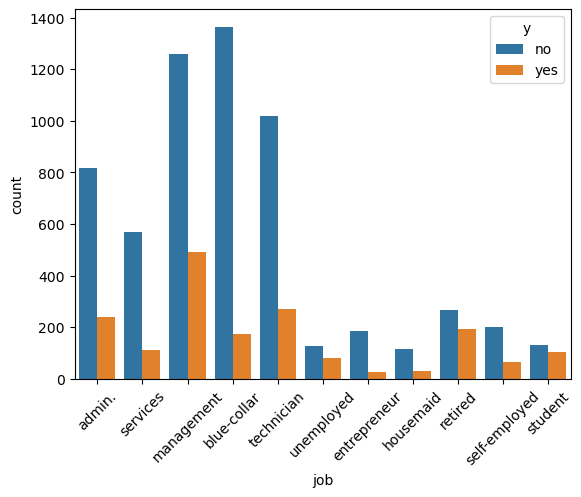

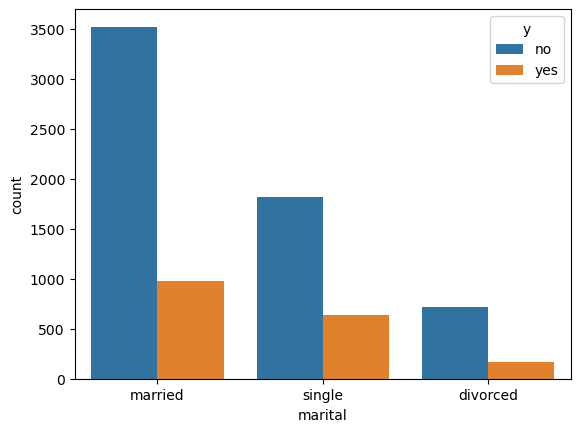

Accuracy: 0.8260038240917782

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1211
           1       0.66      0.49      0.56       358

    accuracy                           0.83      1569
   macro avg       0.76      0.71      0.73      1569
weighted avg       0.81      0.83      0.82      1569



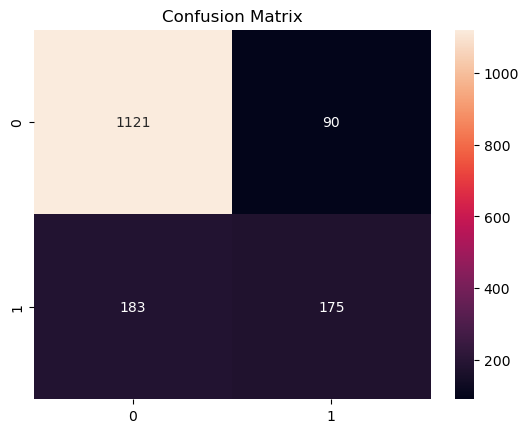


Feature Importance:

      Feature  Coefficient
11  durations     0.872399
15   poutcome     0.832425
3   education     0.226207
2     marital     0.100607
0         age     0.074076
10      month     0.067023
5     balance     0.055672
1         job     0.044949
14   previous     0.036937
9         day     0.034811
13      pdays     0.029268
4     default    -0.061303
8     contact    -0.097192
7        loan    -0.189306
12   campaign    -0.218773
6     housing    -0.579340


In [8]:
# Personal Loan Acceptance Prediction

#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#  Load Dataset (IMPORTANT: sep=';')
data = pd.read_csv('bank-marketing.csv', sep=';')

print(data.head())
print(data.info())

#Remove duration column (important for fair model)
if 'duration' in data.columns:
    data = data.drop('duration', axis=1)

#  Replace 'unknown' with NaN and drop
data.replace('unknown', np.nan, inplace=True)
data.dropna(inplace=True)

# Basic Data Exploration

# Age distribution
sns.histplot(data['age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

# Job vs Loan Acceptance
sns.countplot(x='job', hue='y', data=data)
plt.xticks(rotation=45)
plt.show()

# Marital vs Loan
sns.countplot(x='marital', hue='y', data=data)
plt.show()

# Encode Categorical Columns Automatically
le = LabelEncoder()

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

#  Split Features & Target
X = data.drop('y', axis=1)
y = data['y']

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Model (Increase max_iter to avoid error)
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

#  Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

#  Feature Importance
feature_importance = pd.DataFrame({
    'Feature': data.drop('y', axis=1).columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Importance:\n")
print(feature_importance)
